In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme(style='whitegrid')

In [92]:
df = pd.read_csv('housing.csv')

In [93]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le = LabelEncoder()

In [96]:
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [97]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [10]:
df.ocean_proximity.unique()

array([3, 0, 1, 4, 2])

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
from sklearn.decomposition import PCA

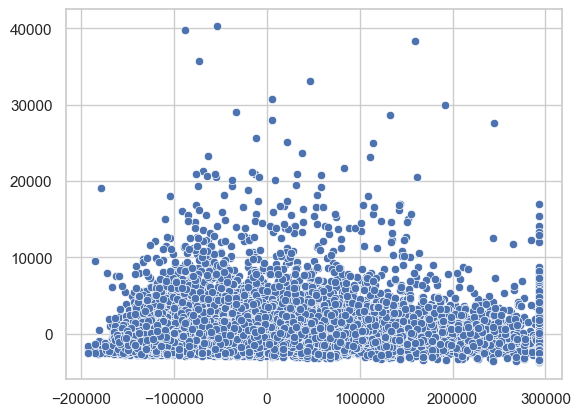

In [14]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)
sns.scatterplot(x=df_2d[:, 0], y=df_2d[:, 1]);

# scale data for PCA

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [17]:
df_scaled

array([[-1.32731375,  1.05171726,  0.98216331, ...,  2.34516291,
         2.12881864,  1.29135065],
       [-1.32232256,  1.04235526, -0.60621017, ...,  2.33263161,
         1.31362603,  1.29135065],
       [-1.33230494,  1.03767426,  1.85576873, ...,  1.78293943,
         1.25818254,  1.29135065],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -1.14317103,
        -0.99247676, -0.11700076],
       [-0.87311515,  1.77727236, -0.84446619, ..., -1.05513604,
        -1.05831591, -0.11700076],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.78060586,
        -1.01759959, -0.11700076]])

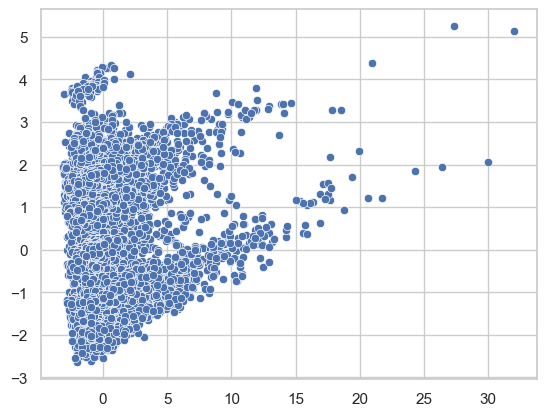

In [18]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df_scaled)
sns.scatterplot(x=df_2d[:, 0], y=df_2d[:, 1]);

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE()
df_2d_tsne = tsne.fit_transform(df_scaled)

In [21]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


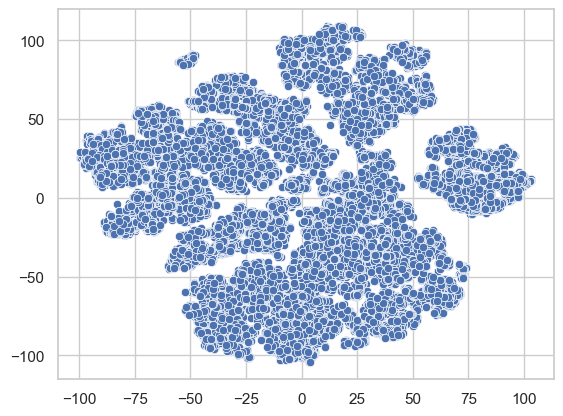

In [22]:
sns.scatterplot(x=df_2d_tsne[:, 0], y=df_2d_tsne[:, 1]);

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans_bow(X, k):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    # Generate the bow plot
    unique_labels = np.unique(labels)
    counts = np.bincount(labels)
    
    fig, ax = plt.subplots()
    ax.bar(unique_labels, counts)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title('K-Means Clustering BOW Plot')
    
    plt.show()


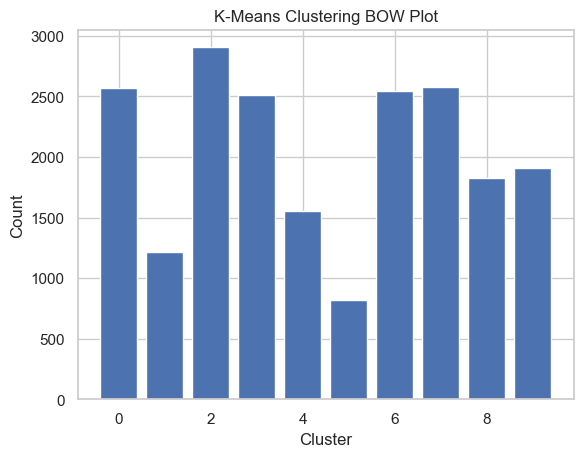

In [24]:

plot_kmeans_bow(df, 10)


In [25]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

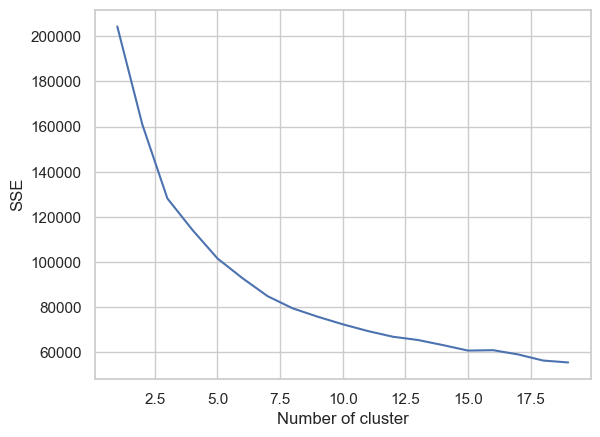

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    df_scaled["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [27]:
df_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,clusters
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,1.291351,17
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,1.291351,5
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,1.291351,15
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,1.291351,15
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,1.291351,15
...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,-0.117001,2
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,-0.117001,2
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,-0.117001,2
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,-0.117001,2


In [28]:
kmeans = KMeans(n_clusters=8, max_iter=1000).fit(df_scaled)

In [29]:
df_scaled["clusters"] = kmeans.labels_

In [30]:
df_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,clusters
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,1.291351,0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,1.291351,4
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,1.291351,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,1.291351,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,1.291351,0
...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,-0.117001,6
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,-0.117001,6
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,-0.117001,6
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,-0.117001,6


In [31]:
tsne = TSNE()
df_2d_tsne = tsne.fit_transform(df_scaled)

In [32]:
df_2d_tsne = pd.DataFrame(df_2d_tsne, columns=['X1', 'X2'])

In [33]:
df_2d_tsne['cluster'] = kmeans.labels_

In [34]:
df_2d_tsne

,X1,X2,cluster
0,81.830338,-25.464674,0
1,0.529897,45.801079,4
2,89.341904,-17.802526,0
3,89.337418,-12.343633,0
4,91.004913,-10.535554,0
...,...,...,...
20428,-39.587524,-80.232590,6
20429,-38.547565,-74.088989,6
20430,-42.821049,-79.285141,6
20431,-41.994999,-78.615997,6


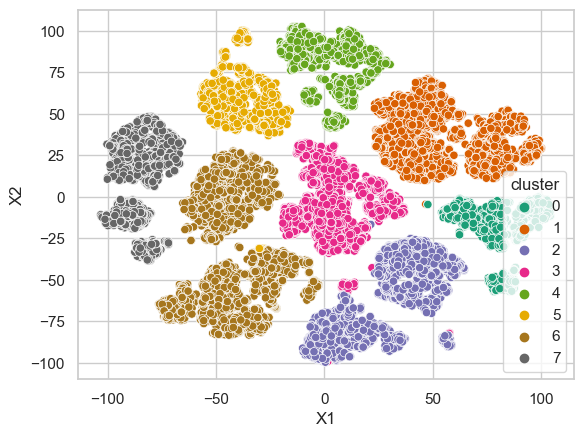

In [35]:
sns.scatterplot(data=df_2d_tsne, x='X1', y='X2', hue='cluster', palette='Dark2');

In [36]:
df_2d_tsne.columns[0]

'X1'

In [37]:
df_2d_tsne

,X1,X2,cluster
0,81.830338,-25.464674,0
1,0.529897,45.801079,4
2,89.341904,-17.802526,0
3,89.337418,-12.343633,0
4,91.004913,-10.535554,0
...,...,...,...
20428,-39.587524,-80.232590,6
20429,-38.547565,-74.088989,6
20430,-42.821049,-79.285141,6
20431,-41.994999,-78.615997,6


In [39]:
df['cluster'] = kmeans.labels_

In [57]:
df['ocean_proximity_cat'] = le.inverse_transform(df['ocean_proximity'])

In [ ]:
df

# Cluster 1

In [42]:
df_cluster_1 = df[df['cluster'] == 1]

In [44]:
df_cluster_1.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
10882,-117.90,33.71,16.0,1917.0,317.0,1324.0,351.0,6.2488,252000.0,0,1
3950,-118.62,34.20,23.0,3098.0,542.0,1486.0,492.0,5.7613,235800.0,0,1
3073,-119.23,35.79,31.0,2862.0,606.0,2467.0,600.0,2.3125,62100.0,1,1


In [45]:
df_cluster_1.shape

(3326, 11)

### Map Visualization

In [55]:
import folium

def plot_multiple_locations(locations):
    # Create a map centered on the first location
    map = folium.Map(location=[locations[0][0], locations[0][1]], zoom_start=12)
    
    # Add markers and annotations for each location
    for lat, lon, label in locations:
        folium.Marker([lat, lon], tooltip=label).add_to(map)
    
    # Display the map
    return map

locations = list(zip(df_cluster_1['longitude'][:10], df_cluster_1['latitude'][:10], df_cluster_1['cluster'][:10]))
#map = plot_multiple_locations(locations)
#map

In [62]:
df_cluster_1['ocean_proximity'].value_counts()

0    2169
1    1157
Name: ocean_proximity, dtype: int64

In [89]:
df = pd.read_csv('housing.csv')

In [98]:
def remove_outlier_sn(df, col, threshold=3):
    
    mean_col = np.mean(df[col])
    std_col = np.std(df[col])
    
    z_scores_col = (df[col] - mean_col) / std_col
    z_scores_col = np.abs(z_scores_col)
    
    df_new = df[~(z_scores_col > threshold)]
   

    print(f'del {df[(z_scores_col > threshold)].shape[0]} row of data!')
    return df_new
# --------------------------------
for col in df.columns:
    df = remove_outlier_sn(df, col)

In [104]:
np.array([[1,3],[1,3],[1,3],[1,3]]).shape

(4, 2)